# Decision Trees
#### Sources
* http://scikit-learn.org/0.17/modules/tree.html

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
X = [[0,0],[1,1]]
y = [0,1]

In [3]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [4]:
clf.predict([[2,2]])

array([1])

# Plotting Decision Tree

In [5]:
iris = load_iris()

In [6]:
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

##### Código abaixo grava um arquivo .dot
_os.unlink_ aparentemente deleta o arquivo
```
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

import os
os.unlink("iris.dot")
```

In [7]:
import pydot_ng as pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

In [8]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,
                     # Nome das 'features' e dos 'target'
                     feature_names=iris.feature_names, class_names=iris.target_names,
                     # Coloca frescura no gráfico
                     filled=True, rounded=True, special_characters=True)

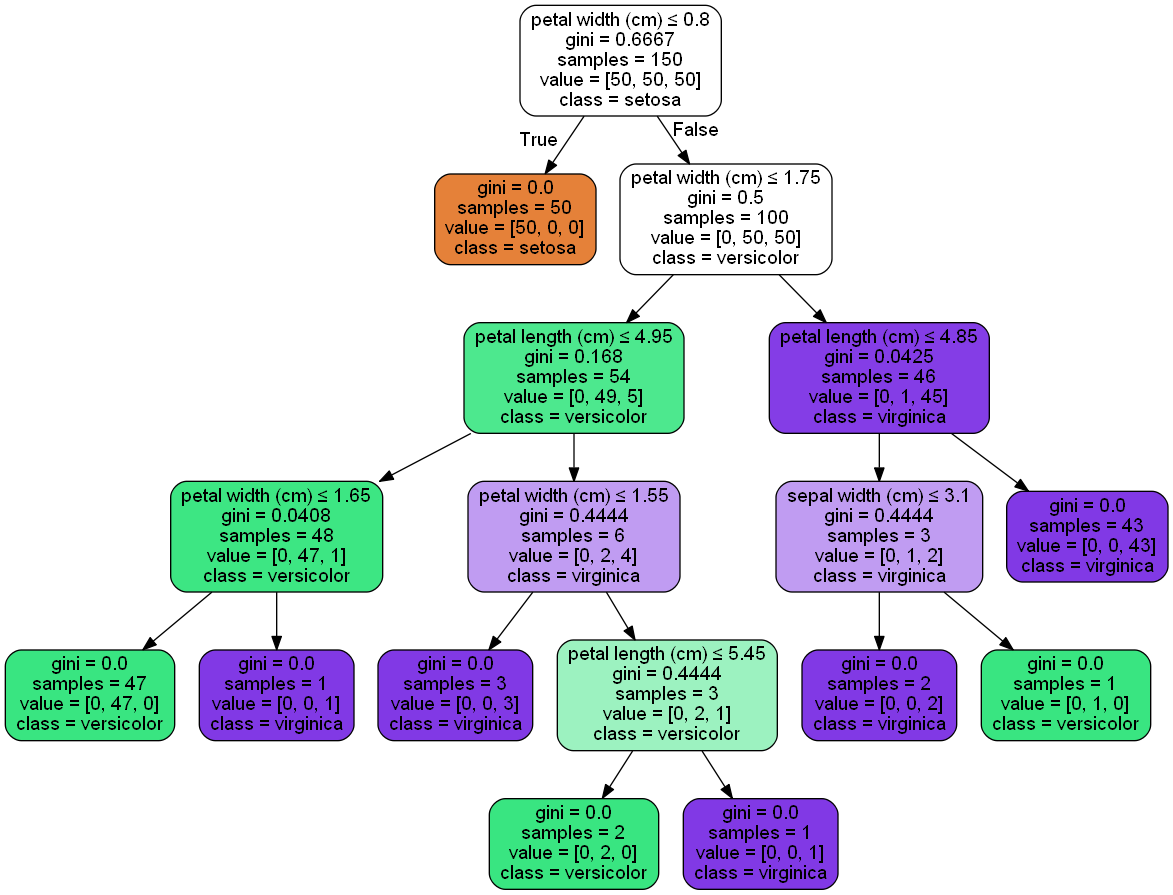

In [9]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Quiz: Coding a Decision Tree

In [10]:
# some_file.py
import sys
sys.path.insert(0, '../choose_your_own/')

In [11]:
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

In [12]:
def classify(features_train, labels_train):
    
    ### your code goes here--should return a trained decision tree classifer
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier()
    clf.fit(features_train, labels_train)
    return clf

In [13]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

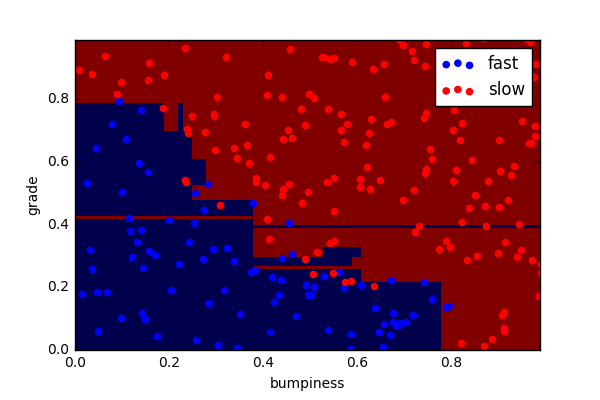

In [14]:
### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)

#### grader code, do not modify below this line
prettyPicture(clf, features_test, labels_test)
Image(open("test.png", "rb").read())

# Quiz: Decision Tree Accuracy

In [20]:
#import sys
#from class_vis import prettyPicture
#from prep_terrain_data import makeTerrainData

import numpy as np
import pylab as pl
from sklearn.tree import DecisionTreeClassifier

features_train, labels_train, features_test, labels_test = makeTerrainData()
#################################################################################


########################## DECISION TREE #################################

#### your code goes here
clf = DecisionTreeClassifier()
clf.fit(features_train, labels_train)
acc = clf.score(features_test, labels_test) ### you fill this in!
### be sure to compute the accuracy on the test set

    
def submitAccuracies():
  return {"acc":round(acc,3)}

In [22]:
submitAccuracies()

{'acc': 0.908}

# Quiz: Decision Tree Accuracy #2

In [ ]:
import sys
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()

In [69]:
########################## DECISION TREE #################################

### your code goes here--now create 2 decision tree classifiers,
### one with min_samples_split=2 and one with min_samples_split=50
### compute the accuracies on the testing data and store
### the accuracy numbers to acc_min_samples_split_2 and
### acc_min_samples_split_50, respectively
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split=2)
clf.fit(features_train, labels_train)
acc_min_samples_split_2 = clf.score(features_test, labels_test) ### you fill this in!

clf2 = DecisionTreeClassifier(min_samples_split=50)
clf2.fit(features_train, labels_train)
acc_min_samples_split_50 = clf2.score(features_test, labels_test) ### you fill this in!

def submitAccuracies():
  return {"acc_min_samples_split_2":round(acc_min_samples_split_2,3),
          "acc_min_samples_split_50":round(acc_min_samples_split_50,3)}
submitAccuracies()

{'acc_min_samples_split_2': 0.912, 'acc_min_samples_split_50': 0.912}

In [71]:
def h(arrs):
    t = 0
    for p in arrs:
        t += - p * np.log2(p)
    return t

In [75]:
print '%.3f' % h([2./3, 1./3])

0.918


In [85]:
x = 1 - (3./4) * h([2./3, 1./3])
print '%.3f' % x

0.311


In [86]:
np.log2(1)

0.0